# **CLIMATEREADY Thermal Comfort Survey Amid Heatwaves Dataset**

This CLIMATEREADY survey dataset contains thermal comfort votes during the 2021 and 2022 heatwave periods in Pamplona, Spain, as well as other relevant parameters self-reported by surveyees (e.g. occupant characteristics and behaviour, key building/dwelling characteristics), used as case study for the research paper **Exploring indoor thermal comfort and its causes and consequences amid heatwaves in a Southern European city— An unsupervised learning approach**.

This dataset is part of the [CLIMATEREADY research project](https://experience.arcgis.com/experience/a85fb262378b49dc87381261a2e53c91). Its goal is to assess the adaptability of Spanish homes to global warming, promote passive measures in the design and use of buildings to achieve adequate indoor environmental conditions in summer conditions and in heat wave events, minimise and quantify the risks of overheating with the minimum energy demand for cooling when conditions make it necessary.

In [138]:
import sklearn
print(sklearn.__version__)

1.3.2


## **Load libraries**

In [139]:
#Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Connection to Google Drive**

In [140]:
# Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading and inspecting data**

In [141]:
dataset = "/content/drive/My Drive/Post-Doc DATAI/Colaboraciones de investigacion/CLIMATEREADY/encuestas/paper/final draft/climateready-heatwave-survey.csv"

In [142]:
# Read Excel file
merge = pd.read_csv(dataset, sep=";",
                      encoding='latin-1') # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 1: invalid continuation byte. SOLVED: encoding='latin-1'

In [143]:
merge

,ID,Timestamp,Date,Hour,hw_True,meanTout,ThermostatTemp,TSen_day,TSen_night,TSatisf_day,...,LivRoom_SrfcAreaWindow_below2,LivRoom_SrfcAreaWindow_above2,Bedroom_SrfcAreaWindow_below2,Bedroom_SrfcAreaWindow_above2,AC_Installed_Yes,WouldYouInstallAC_Yes,hasCoolRoom,hasCoolingAlternatives,HeatSymptoms,SleepingProblems
0,4,22/07/2021 12:16,20210722,12,False,27.5,25.73,2,0,0,...,False,True,False,True,False,False,True,True,False,False
1,18,22/07/2021 14:07,20210722,14,False,27.5,25.73,0,1,1,...,False,True,False,True,False,True,False,True,False,True
2,434,17/08/2022 8:33,20220817,8,False,18.1,27.05,1,1,2,...,False,True,False,True,False,False,False,False,False,False
3,545,12/08/2022 17:26,20220812,17,True,29.2,27.38,3,3,-3,...,False,True,False,True,False,False,True,True,True,True
4,538,22/07/2022 16:54,20220722,16,False,20.7,28.00,2,2,-1,...,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,462,15/07/2022 20:29,20220715,20,True,27.7,29.00,3,2,-2,...,False,True,True,False,False,False,False,False,True,True
185,405,12/08/2022 17:38,20220812,17,True,29.2,28.00,3,2,-2,...,False,True,False,True,True,False,True,False,False,False
186,572,17/08/2022 16:39,20220817,16,False,18.1,27.05,-1,-1,0,...,False,True,True,False,False,False,False,False,True,False
187,161,14/08/2021 19:19,20210814,19,True,26.2,26.00,2,2,0,...,False,True,False,True,False,False,False,True,False,False


In [144]:
merge.columns

Index(['ID', 'Timestamp', 'Date', 'Hour', 'hw_True', 'meanTout',
       'ThermostatTemp', 'TSen_day', 'TSen_night', 'TSatisf_day',
       'TSatisf_night', 'TPref_day', 'TPref_night', 'Gender', 'Age',
       'NatVent_night', 'UsesCoolingAlternatives', 'Hour_7_14h_True',
       'Hour_14_21h_True', 'Hour_21_7h_True', 'ShadingDevices_No',
       'ShadingDevices_WhenDirectSun', 'ShadingDevices_AllAfternoon',
       'ShadingDevices_AllMorning', 'ShadingDevices_AllDay',
       'NatVent_day_ToutCool', 'NatVent_day_Anytime', 'NatVent_day_No',
       'hasAC_No', 'hasAC_DormOrLiving', 'hasAC_DormAndLiving',
       'hasAC_AllRooms', 'HouseholdSize', 'is_31001', 'is_31002', 'is_31003',
       'is_31004', 'is_31005', 'is_31006', 'is_31007', 'is_31008', 'is_31009',
       'is_31010', 'is_31011', 'is_31012', 'is_31013', 'is_31014', 'is_31015',
       'is_31016', 'isNot_pamplona', 'before_1980', 'between_1980_2006',
       'after_2007', 'dwelling_OldTown', 'dwelling_Block', 'dwelling_Tower',
       'dw

## **Research sub-question 1**

### **Normalized rank**



In [145]:
from scipy.stats import rankdata

In [146]:
merge['TSen_day_NR'] = (rankdata(merge['TSen_day']) - 1) / (len(merge['TSen_day']) - 1)
merge['TSen_night_NR'] = (rankdata(merge['TSen_night']) - 1) / (len(merge['TSen_night']) - 1)

merge['TSatisf_day_NR'] = (rankdata(merge['TSatisf_day']) - 1) / (len(merge['TSatisf_day']) - 1)
merge['TSatisf_night_NR'] = (rankdata(merge['TSatisf_night']) - 1) / (len(merge['TSatisf_night']) - 1)

merge['TPref_day_NR'] = (rankdata(merge['TPref_day']) - 1) / (len(merge['TPref_day']) - 1)
merge['TPref_night_NR'] = (rankdata(merge['TPref_night']) - 1) / (len(merge['TPref_night']) - 1)

### **KMeans**



In [147]:
kmeans_df = merge[['TSen_day_NR', "TSatisf_day_NR","TPref_day_NR",'TSen_night_NR',"TSatisf_night_NR","TPref_night_NR"]]
kmeans_df.reset_index(drop=True)
kmeans_df = kmeans_df.astype(float)
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TSen_day_NR       189 non-null    float64
 1   TSatisf_day_NR    189 non-null    float64
 2   TPref_day_NR      189 non-null    float64
 3   TSen_night_NR     189 non-null    float64
 4   TSatisf_night_NR  189 non-null    float64
 5   TPref_night_NR    189 non-null    float64
dtypes: float64(6)
memory usage: 9.0 KB


In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette score for K-means with 2 clusters: 0.39744292446783525
Silhouette score for K-means with 3 clusters: 0.3639571042052043
Silhouette score for K-means with 4 clusters: 0.36240852630989157
Silhouette score for K-means with 5 clusters: 0.34779213880147675
Silhouette score for K-means with 6 clusters: 0.33702189759567003
Silhouette score for K-means with 7 clusters: 0.35094514806604005
Silhouette score for K-means with 8 clusters: 0.3219344365668626
Silhouette score for K-means with 9 clusters: 0.35802787233366734
Silhouette score for K-means with 10 clusters: 0.3649137811341014


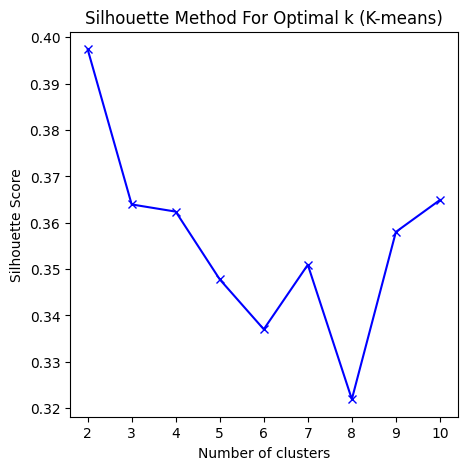

In [149]:
# Silhouette method for K-means
silhouette_scores_kmeans = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(kmeans_df)
    score = silhouette_score(kmeans_df, labels)
    silhouette_scores_kmeans.append(score)
    print(f"Silhouette score for K-means with {k} clusters: {score}")

# Plot the silhouette scores for K-means
plt.figure(figsize=(5, 5))
plt.plot(K, silhouette_scores_kmeans, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (K-means)')
plt.show()

In [150]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
merge['cluster_kmeans'] = kmeans.fit_predict(kmeans_df)

In [151]:
merge.groupby("cluster_kmeans").agg("count")["ID"]

cluster_kmeans
0    97
1    92
Name: ID, dtype: int64

In [152]:
# merge['cluster_kmeans'] = merge['cluster_kmeans'].replace({1: 0, 0: 1})

In [153]:
merge.groupby("cluster_kmeans").agg("count")["ID"]

cluster_kmeans
0    97
1    92
Name: ID, dtype: int64

In [154]:
# Select only numeric columns
numeric_columns = merge.select_dtypes(include=[np.number])

In [155]:
numeric_columns.groupby("cluster_kmeans").agg("median")["TPref_night"]

cluster_kmeans
0   -1.0
1   -1.0
Name: TPref_night, dtype: float64

In [156]:
merge[["ID","cluster_kmeans"]].to_csv('cluster_kmeans_enpunto.csv', sep=';', index=False)

#### **Summary: Sensation**



In [157]:
TSen_day_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TSen_day").agg("count")[["ID"]]
TSen_day_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TSen_day").agg("count")[["ID"]]

TSen_day_cluster0 = TSen_day_cluster0.transpose()
TSen_day_cluster1 = TSen_day_cluster1.transpose()

TSen_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSen_day_cluster0.index])
TSen_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSen_day_cluster1.index])

TSen_day_summary = pd.concat([TSen_day_cluster0, TSen_day_cluster1], axis=0)
TSen_day_summary = TSen_day_summary.droplevel(1)
TSen_day_summary = TSen_day_summary.reset_index()
TSen_day_summary["time_of_the_day"] = "Day"
TSen_day_summary

TSen_day,index,-1,0,1,2,3,time_of_the_day
0,Comfortable,10.0,18,26,38,5,Day
1,Uncomfortable,NaN,1,1,24,66,Day


In [158]:
TSen_night_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TSen_night").agg("count")[["ID"]]
TSen_night_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TSen_night").agg("count")[["ID"]]

TSen_night_cluster0 = TSen_night_cluster0.transpose()
TSen_night_cluster1 = TSen_night_cluster1.transpose()

TSen_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSen_night_cluster0.index])
TSen_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSen_night_cluster1.index])

TSen_night_summary = pd.concat([TSen_night_cluster0, TSen_night_cluster1], axis=0)
TSen_night_summary = TSen_night_summary.droplevel(1)
TSen_night_summary = TSen_night_summary.reset_index()
TSen_night_summary["time_of_the_day"] = "Night"
TSen_night_summary

TSen_night,index,-2,-1,0,1,2,3,time_of_the_day
0,Comfortable,2.0,14.0,36,33,12,NaN,Night
1,Uncomfortable,NaN,NaN,2,12,42,36.0,Night


In [159]:
TSen_summary = pd.concat([TSen_day_summary, TSen_night_summary], axis=0)
TSen_summary.to_csv('TSen_summary_kmeans.csv', sep=';', index=False)
TSen_summary

,index,-1,0,1,2,3,time_of_the_day,-2
0,Comfortable,10.0,18,26,38,5.0,Day,NaN
1,Uncomfortable,NaN,1,1,24,66.0,Day,NaN
0,Comfortable,14.0,36,33,12,NaN,Night,2.0
1,Uncomfortable,NaN,2,12,42,36.0,Night,NaN


#### **Summary: Satisfaction**



In [160]:
TSatis_day_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TSatisf_day").agg("count")[["ID"]]
TSatis_day_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TSatisf_day").agg("count")[["ID"]]

TSatis_day_cluster0 = TSatis_day_cluster0.transpose()
TSatis_day_cluster1 = TSatis_day_cluster1.transpose()

TSatis_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSatis_day_cluster0.index])
TSatis_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSatis_day_cluster1.index])

TSatis_day_summary = pd.concat([TSatis_day_cluster0, TSatis_day_cluster1], axis=0)
TSatis_day_summary = TSatis_day_summary.droplevel(1)
TSatis_day_summary = TSatis_day_summary.reset_index()
TSatis_day_summary["time_of_the_day"] = "Day"
TSatis_day_summary

TSatisf_day,index,-3,-2,-1,0,1,2,3,time_of_the_day
0,Comfortable,2,7,17,26,14.0,24.0,7.0,Day
1,Uncomfortable,23,45,21,3,NaN,NaN,NaN,Day


In [161]:
TSatis_night_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TSatisf_night").agg("count")[["ID"]]
TSatis_night_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TSatisf_night").agg("count")[["ID"]]

TSatis_night_cluster0 = TSatis_night_cluster0.transpose()
TSatis_night_cluster1 = TSatis_night_cluster1.transpose()

TSatis_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSatis_night_cluster0.index])
TSatis_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSatis_night_cluster1.index])

TSatis_night_summary = pd.concat([TSatis_night_cluster0, TSatis_night_cluster1], axis=0)
TSatis_night_summary = TSatis_night_summary.droplevel(1)
TSatis_night_summary = TSatis_night_summary.reset_index()
TSatis_night_summary["time_of_the_day"] = "Night"
TSatis_night_summary

TSatisf_night,index,-2,-1,0,1,2,3,-3,time_of_the_day
0,Comfortable,4,14,22,18,26.0,13.0,NaN,Night
1,Uncomfortable,35,27,8,3,NaN,NaN,19.0,Night


In [162]:
TSatis_summary = pd.concat([TSatis_day_summary, TSatis_night_summary], axis=0)
TSatis_summary.to_csv('TSatis_summary_kmeans.csv', sep=';', index=False)
TSatis_summary

,index,-3,-2,-1,0,1,2,3,time_of_the_day
0,Comfortable,2.0,7,17,26,14.0,24.0,7.0,Day
1,Uncomfortable,23.0,45,21,3,NaN,NaN,NaN,Day
0,Comfortable,NaN,4,14,22,18.0,26.0,13.0,Night
1,Uncomfortable,19.0,35,27,8,3.0,NaN,NaN,Night


#### **Summary: Preference**



In [163]:
TPref_day_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TPref_day").agg("count")[["ID"]]
TPref_day_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TPref_day").agg("count")[["ID"]]

TPref_day_cluster0 = TPref_day_cluster0.transpose()
TPref_day_cluster1 = TPref_day_cluster1.transpose()

TPref_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TPref_day_cluster0.index])
TPref_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TPref_day_cluster1.index])

TPref_day_summary = pd.concat([TPref_day_cluster0, TPref_day_cluster1], axis=0)
TPref_day_summary = TPref_day_summary.droplevel(1)
TPref_day_summary = TPref_day_summary.reset_index()
TPref_day_summary["time_of_the_day"] = "Day"
TPref_day_summary

TPref_day,index,-1,0,1,time_of_the_day
0,Comfortable,70,26,1.0,Day
1,Uncomfortable,90,2,NaN,Day


In [164]:
TPref_night_cluster0 = merge[merge["cluster_kmeans"] == 0].groupby("TPref_night").agg("count")[["ID"]]
TPref_night_cluster1 = merge[merge["cluster_kmeans"] == 1].groupby("TPref_night").agg("count")[["ID"]]

TPref_night_cluster0 = TPref_night_cluster0.transpose()
TPref_night_cluster1 = TPref_night_cluster1.transpose()

TPref_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TPref_night_cluster0.index])
TPref_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TPref_night_cluster1.index])

TPref_night_summary = pd.concat([TPref_night_cluster0, TPref_night_cluster1], axis=0)
TPref_night_summary = TPref_night_summary.droplevel(1)
TPref_night_summary = TPref_night_summary.reset_index()
TPref_night_summary["time_of_the_day"] = "Night"
TPref_night_summary

TPref_night,index,-1,0,time_of_the_day
0,Comfortable,57,40.0,Night
1,Uncomfortable,92,NaN,Night


In [165]:
TPref_summary = pd.concat([TPref_day_summary, TPref_night_summary], axis=0)
TPref_summary.to_csv('TPref_summary_kmeans.csv', sep=';', index=False)
TPref_summary

,index,-1,0,1,time_of_the_day
0,Comfortable,70,26.0,1.0,Day
1,Uncomfortable,90,2.0,NaN,Day
0,Comfortable,57,40.0,NaN,Night
1,Uncomfortable,92,NaN,NaN,Night


### **Hierarchical clustering**



In [166]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [167]:
# Your data
hclust_df = merge[['TSen_day_NR', 'TSatisf_day_NR', 'TPref_day_NR', 'TSen_night_NR', 'TSatisf_night_NR', 'TPref_night_NR']]
hclust_df.reset_index(drop=True, inplace=True)  # Make sure to use drop=True to avoid creating a new index
hclust_df = hclust_df.astype(float)

Silhouette score for Hierarchical Clustering with 2 clusters: 0.39303289900062277
Silhouette score for Hierarchical Clustering with 3 clusters: 0.26062106645688293
Silhouette score for Hierarchical Clustering with 4 clusters: 0.2655426103858992
Silhouette score for Hierarchical Clustering with 5 clusters: 0.24146290444152352
Silhouette score for Hierarchical Clustering with 6 clusters: 0.25605175484769144
Silhouette score for Hierarchical Clustering with 7 clusters: 0.3087757744331403
Silhouette score for Hierarchical Clustering with 8 clusters: 0.31164065476532404
Silhouette score for Hierarchical Clustering with 9 clusters: 0.34129300157400505
Silhouette score for Hierarchical Clustering with 10 clusters: 0.35455821391170456


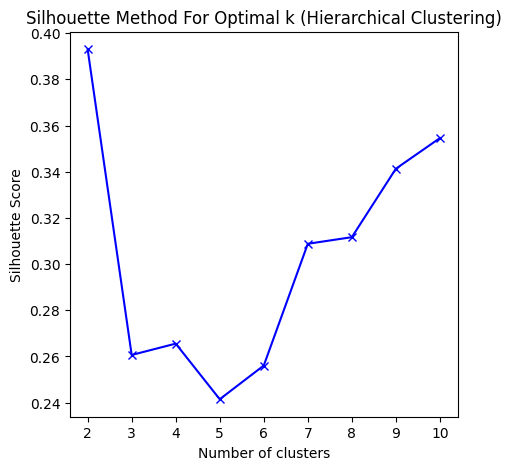

In [168]:
# Silhouette method for Hierarchical Clustering
silhouette_scores_hierarchical = []
for k in K:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    labels = hierarchical_clustering.fit_predict(hclust_df)
    score = silhouette_score(hclust_df, labels)
    silhouette_scores_hierarchical.append(score)
    print(f"Silhouette score for Hierarchical Clustering with {k} clusters: {score}")

# Plot the silhouette scores for hierarchical clustering
plt.figure(figsize=(5, 5))
plt.plot(K, silhouette_scores_hierarchical, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (Hierarchical Clustering)')
plt.show()

In [169]:
# Apply hierarchical clustering
n_clusters = 2  # Set the number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete') # average or complete
merge['cluster_hierarchical'] = hierarchical_clustering.fit_predict(hclust_df)

In [170]:
# Group by cluster and count
cluster_counts = merge.groupby('cluster_hierarchical').agg(count=('ID', 'count'))
print(cluster_counts)

                      count
cluster_hierarchical       
0                       113
1                        76


In [171]:
merge['cluster_hierarchical'] = merge['cluster_hierarchical'].replace({1: 0, 0: 1})

In [172]:
merge.groupby("cluster_hierarchical").agg("count")["ID"]

cluster_hierarchical
0     76
1    113
Name: ID, dtype: int64

In [173]:
# Select only numeric columns
numeric_columns = merge.select_dtypes(include=[np.number])

In [174]:
numeric_columns.groupby("cluster_hierarchical").agg("median")["TPref_night"]

cluster_hierarchical
0   -1.0
1   -1.0
Name: TPref_night, dtype: float64

In [175]:
merge[["ID","cluster_hierarchical"]].to_csv('cluster_hierarchical_enpunto.csv', sep=';', index=False)

##### **Summary: Sensation**



In [176]:
TSen_day_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TSen_day").agg("count")[["ID"]]
TSen_day_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TSen_day").agg("count")[["ID"]]

TSen_day_cluster0 = TSen_day_cluster0.transpose()
TSen_day_cluster1 = TSen_day_cluster1.transpose()

TSen_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSen_day_cluster0.index])
TSen_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSen_day_cluster1.index])

TSen_day_summary = pd.concat([TSen_day_cluster0, TSen_day_cluster1], axis=0)
TSen_day_summary = TSen_day_summary.droplevel(1)
TSen_day_summary = TSen_day_summary.reset_index()
TSen_day_summary["time_of_the_day"] = "Day"
TSen_day_summary

TSen_day,index,-1,0,1,2,3,time_of_the_day
0,Comfortable,8,17,25,26,NaN,Day
1,Uncomfortable,2,2,2,36,71.0,Day


In [177]:
TSen_night_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TSen_night").agg("count")[["ID"]]
TSen_night_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TSen_night").agg("count")[["ID"]]

TSen_night_cluster0 = TSen_night_cluster0.transpose()
TSen_night_cluster1 = TSen_night_cluster1.transpose()

TSen_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSen_night_cluster0.index])
TSen_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSen_night_cluster1.index])

TSen_night_summary = pd.concat([TSen_night_cluster0, TSen_night_cluster1], axis=0)
TSen_night_summary = TSen_night_summary.droplevel(1)
TSen_night_summary = TSen_night_summary.reset_index()
TSen_night_summary["time_of_the_day"] = "Night"
TSen_night_summary

TSen_night,index,-2,-1,0,1,2,3,time_of_the_day
0,Comfortable,2.0,10,31,27,6,NaN,Night
1,Uncomfortable,NaN,4,7,18,48,36.0,Night


In [178]:
TSen_summary = pd.concat([TSen_day_summary, TSen_night_summary], axis=0)
TSen_summary.to_csv('TSen_summary_hclust.csv', sep=';', index=False)
TSen_summary

,index,-1,0,1,2,3,time_of_the_day,-2
0,Comfortable,8,17,25,26,NaN,Day,NaN
1,Uncomfortable,2,2,2,36,71.0,Day,NaN
0,Comfortable,10,31,27,6,NaN,Night,2.0
1,Uncomfortable,4,7,18,48,36.0,Night,NaN


##### **Summary: Satisfaction**



In [179]:
TSatis_day_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TSatisf_day").agg("count")[["ID"]]
TSatis_day_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TSatisf_day").agg("count")[["ID"]]

TSatis_day_cluster0 = TSatis_day_cluster0.transpose()
TSatis_day_cluster1 = TSatis_day_cluster1.transpose()

TSatis_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSatis_day_cluster0.index])
TSatis_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSatis_day_cluster1.index])

TSatis_day_summary = pd.concat([TSatis_day_cluster0, TSatis_day_cluster1], axis=0)
TSatis_day_summary = TSatis_day_summary.droplevel(1)
TSatis_day_summary = TSatis_day_summary.reset_index()
TSatis_day_summary["time_of_the_day"] = "Day"
TSatis_day_summary

TSatisf_day,index,-1,0,1,2,3,-3,-2,time_of_the_day
0,Comfortable,12,21,12,24.0,7.0,NaN,NaN,Day
1,Uncomfortable,26,8,2,NaN,NaN,25.0,52.0,Day


In [180]:
TSatis_night_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TSatisf_night").agg("count")[["ID"]]
TSatis_night_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TSatisf_night").agg("count")[["ID"]]

TSatis_night_cluster0 = TSatis_night_cluster0.transpose()
TSatis_night_cluster1 = TSatis_night_cluster1.transpose()

TSatis_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TSatis_night_cluster0.index])
TSatis_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TSatis_night_cluster1.index])

TSatis_night_summary = pd.concat([TSatis_night_cluster0, TSatis_night_cluster1], axis=0)
TSatis_night_summary = TSatis_night_summary.droplevel(1)
TSatis_night_summary = TSatis_night_summary.reset_index()
TSatis_night_summary["time_of_the_day"] = "Night"
TSatis_night_summary

TSatisf_night,index,-1,0,1,2,3,-3,-2,time_of_the_day
0,Comfortable,7,18,17,22,12,NaN,NaN,Night
1,Uncomfortable,34,12,4,4,1,19.0,39.0,Night


In [181]:
TSatis_summary = pd.concat([TSatis_day_summary, TSatis_night_summary], axis=0)
TSatis_summary.to_csv('TSatis_summary_hclust.csv', sep=';', index=False)
TSatis_summary

,index,-1,0,1,2,3,-3,-2,time_of_the_day
0,Comfortable,12,21,12,24.0,7.0,NaN,NaN,Day
1,Uncomfortable,26,8,2,NaN,NaN,25.0,52.0,Day
0,Comfortable,7,18,17,22.0,12.0,NaN,NaN,Night
1,Uncomfortable,34,12,4,4.0,1.0,19.0,39.0,Night


##### **Summary: Preference**



In [182]:
TPref_day_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TPref_day").agg("count")[["ID"]]
TPref_day_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TPref_day").agg("count")[["ID"]]

TPref_day_cluster0 = TPref_day_cluster0.transpose()
TPref_day_cluster1 = TPref_day_cluster1.transpose()

TPref_day_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TPref_day_cluster0.index])
TPref_day_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TPref_day_cluster1.index])

TPref_day_summary = pd.concat([TPref_day_cluster0, TPref_day_cluster1], axis=0)
TPref_day_summary = TPref_day_summary.droplevel(1)
TPref_day_summary = TPref_day_summary.reset_index()
TPref_day_summary["time_of_the_day"] = "Day"
TPref_day_summary

TPref_day,index,-1,0,1,time_of_the_day
0,Comfortable,50,25,1.0,Day
1,Uncomfortable,110,3,NaN,Day


In [183]:
TPref_night_cluster0 = merge[merge["cluster_hierarchical"] == 0].groupby("TPref_night").agg("count")[["ID"]]
TPref_night_cluster1 = merge[merge["cluster_hierarchical"] == 1].groupby("TPref_night").agg("count")[["ID"]]

TPref_night_cluster0 = TPref_night_cluster0.transpose()
TPref_night_cluster1 = TPref_night_cluster1.transpose()

TPref_night_cluster0.index = pd.MultiIndex.from_product([['Comfortable'], TPref_night_cluster0.index])
TPref_night_cluster1.index = pd.MultiIndex.from_product([['Uncomfortable'], TPref_night_cluster1.index])

TPref_night_summary = pd.concat([TPref_night_cluster0, TPref_night_cluster1], axis=0)
TPref_night_summary = TPref_night_summary.droplevel(1)
TPref_night_summary = TPref_night_summary.reset_index()
TPref_night_summary["time_of_the_day"] = "Night"
TPref_night_summary

TPref_night,index,-1,0,time_of_the_day
0,Comfortable,41,35,Night
1,Uncomfortable,108,5,Night


In [184]:
TPref_summary = pd.concat([TPref_day_summary, TPref_night_summary], axis=0)
TPref_summary.to_csv('TPref_summary_hclust.csv', sep=';', index=False)
TPref_summary

,index,-1,0,1,time_of_the_day
0,Comfortable,50,25,1.0,Day
1,Uncomfortable,110,3,NaN,Day
0,Comfortable,41,35,NaN,Night
1,Uncomfortable,108,5,NaN,Night


### **Venn Diagram**



In [185]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['cluster_kmeans', 'cluster_hierarchical']]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=df_subset['cluster_kmeans'],
                               columns=df_subset['cluster_hierarchical'],
                               rownames=['K-Means'], colnames=['Hierarchical Clustering'])

# Print the confusion matrix-like table
print(confusion_matrix)

Hierarchical Clustering   0   1
K-Means                        
0                        76  21
1                         0  92


In [186]:
pip install matplotlib_venn

In [187]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

In [188]:
kmeans_values = set(merge.loc[merge['cluster_kmeans'] == 1].index)
hierarchical_values = set(merge.loc[merge['cluster_hierarchical'] == 1].index)

In [189]:
# Calculate the intersection and set sizes
venn_labels = {'10': kmeans_values - hierarchical_values,
               '01': hierarchical_values - kmeans_values,
               '11': kmeans_values.intersection(hierarchical_values)}

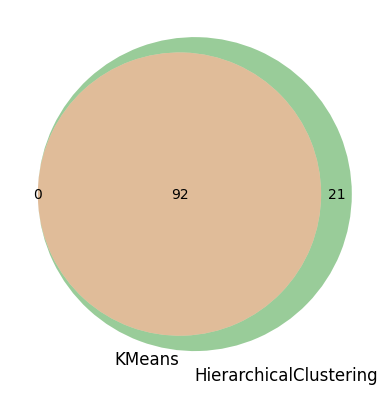

In [190]:
# Create Venn diagram
venn_labels = venn2(subsets=(len(venn_labels['10']), len(venn_labels['01']), len(venn_labels['11'])),
                   set_labels=('KMeans', 'HierarchicalClustering'))
plt.savefig("venn_htd.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [191]:
kmeans_values = set(merge.loc[merge['cluster_kmeans'] == 0].index)
hierarchical_values = set(merge.loc[merge['cluster_hierarchical'] == 0].index)

In [192]:
# Calculate the intersection and set sizes
venn_labels = {'10': kmeans_values - hierarchical_values,
               '01': hierarchical_values - kmeans_values,
               '11': kmeans_values.intersection(hierarchical_values)}

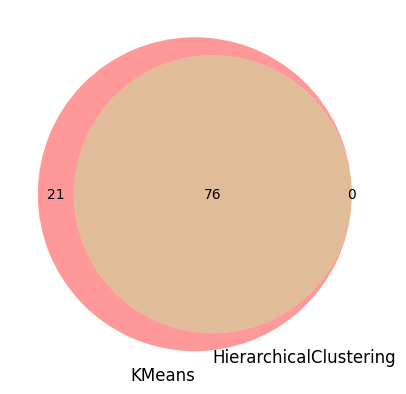

In [193]:
# Create Venn diagram
venn_labels = venn2(subsets=(len(venn_labels['10']), len(venn_labels['01']), len(venn_labels['11'])),
                   set_labels=('KMeans', 'HierarchicalClustering'))
plt.savefig("venn_ltd.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [194]:
from sklearn.metrics import adjusted_rand_score

In [195]:
# Create your clustering results as 1D arrays
kmeans_array = merge["cluster_kmeans"].values
hierarchical_array = merge["cluster_hierarchical"].values

In [196]:
# Calculate ARI
ari = adjusted_rand_score(kmeans_array, hierarchical_array)

# Print the results
print(f'ARI for LTD: {ari}')

ARI for LTD: 0.6028977474140071


##### **Crosstab Sensation**



In [197]:
import seaborn as sns

**K-Means**

In [198]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSen_day', 'TSen_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSen_night'],
                               columns=filtered_df['TSen_day'],
                               rownames=['TSen_night'], colnames=['TSen_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSen_day    0  1   2   3
TSen_night              
0           1  0   0   1
1           0  0   5   7
2           0  1  15  26
3           0  0   4  32


In [199]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSen_day', 'TSen_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSen_night'],
                               columns=filtered_df['TSen_day'],
                               rownames=['TSen_night'], colnames=['TSen_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSen_day    -1   0   1   2   3
TSen_night                    
-2           2   0   0   0   0
-1           6   4   1   2   1
 0           2   9  15   7   3
 1           0   5   9  18   1
 2           0   0   1  11   0


**Hierarchical Clustering**

In [200]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSen_day', 'TSen_night', 'cluster_hierarchical']]

# Filter by the desired cluster_cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSen_night'],
                               columns=filtered_df['TSen_day'],
                               rownames=['TSen_night'], colnames=['TSen_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSen_day    -1   0   1   2   3
TSen_night                    
-1           2   0   0   1   1
 0           0   2   0   1   4
 1           0   0   0  10   8
 2           0   0   2  20  26
 3           0   0   0   4  32


In [201]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSen_day', 'TSen_night', 'cluster_hierarchical']]

# Filter by the desired cluster_cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSen_night'],
                               columns=filtered_df['TSen_day'],
                               rownames=['TSen_night'], colnames=['TSen_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSen_day    -1   0   1   2
TSen_night                
-2           2   0   0   0
-1           4   4   1   1
 0           2   8  15   6
 1           0   5   9  13
 2           0   0   0   6


**Hstograms**

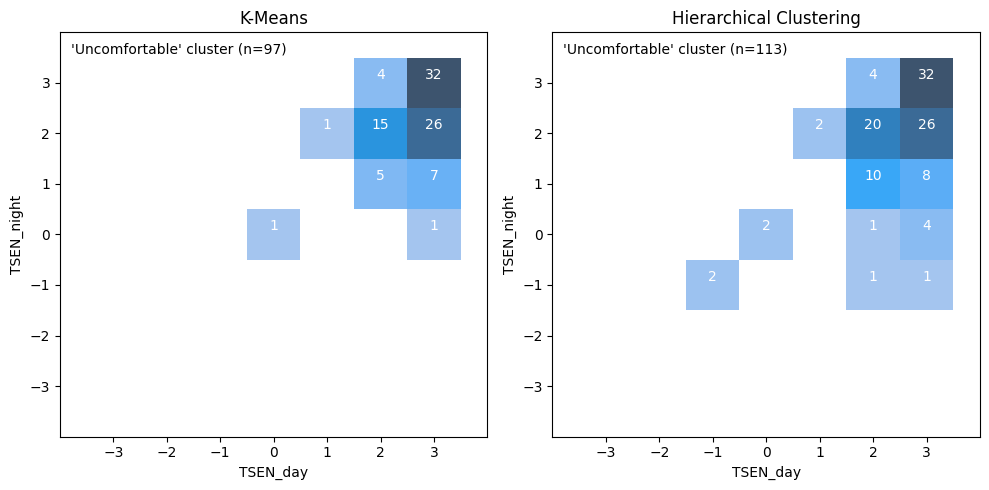

In [202]:
  # List of filter conditions
  filters = ["cluster_kmeans", "cluster_hierarchical"]

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  # Loop through filters and create subplots
  for i, filter_col in enumerate(filters):
      ax = axes[i]

      # Apply filter condition and plot
      data_subset = merge[merge[filter_col] == 1]
      sns.histplot(merge[merge[filter_col] == 1], x="TSen_day", y="TSen_night", legend=False, discrete=(True, True), ax=ax)

      ticks = range(-3, 4)
      ax.set_xticks(ticks)
      ax.set_yticks(ticks)

      ax.set_xlim(-4, 4)
      ax.set_ylim(-4, 4)

      # Set subplot title
      if filter_col == "cluster_kmeans":
          ax.set_title("K-Means")
          # Add text in the top left corner
          ax.text(-3.8, 3.8, "'Uncomfortable' cluster (n=97)", fontsize=10, ha='left', va='top', color='black')
      elif filter_col == "cluster_hierarchical":
          ax.set_title("Hierarchical Clustering")
          # Add text in the top left corner
          ax.text(-3.8, 3.8, "'Uncomfortable' cluster (n=113)", fontsize=10, ha='left', va='top', color='black')

      # Set x and y axis titles
      ax.set_xlabel("TSEN_day")
      ax.set_ylabel("TSEN_night")

      # Add frequency labels using annotate
      for (x, y), count in data_subset.groupby(["TSen_day", "TSen_night"]).size().items():
          ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TSen_HTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

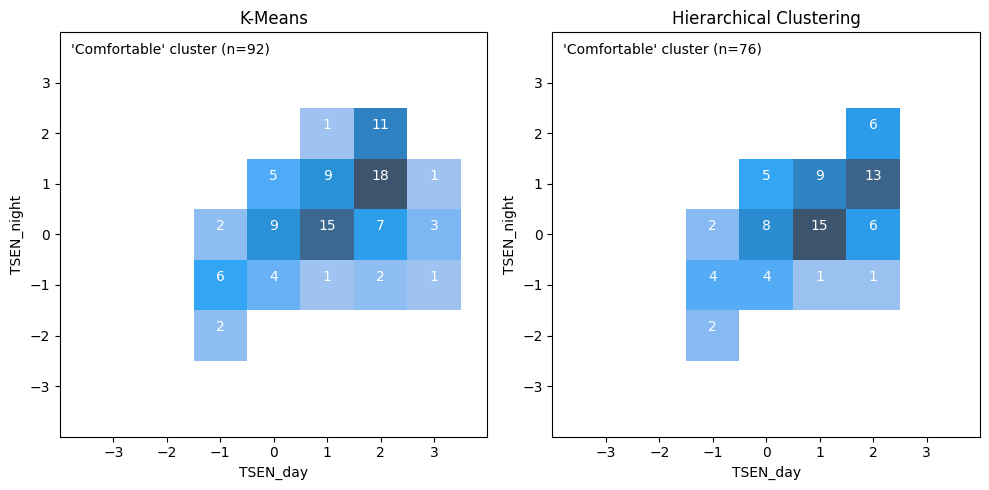

In [203]:
# List of filter conditions
filters = ["cluster_kmeans", "cluster_hierarchical"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loop through filters and create subplots
for i, filter_col in enumerate(filters):
    ax = axes[i]

    # Apply filter condition and plot
    data_subset = merge[merge[filter_col] == 0]
    sns.histplot(merge[merge[filter_col] == 0], x="TSen_day", y="TSen_night", legend=False, discrete=(True, True), ax=ax)

    ticks = range(-3, 4)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    # Set subplot title
    if filter_col == "cluster_kmeans":
        ax.set_title("K-Means")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Comfortable' cluster (n=92)", fontsize=10, ha='left', va='top', color='black')
    elif filter_col == "cluster_hierarchical":
        ax.set_title("Hierarchical Clustering")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Comfortable' cluster (n=76)", fontsize=10, ha='left', va='top', color='black')

    # Set x and y axis titles
    ax.set_xlabel("TSEN_day")
    ax.set_ylabel("TSEN_night")

    # Add frequency labels using annotate
    for (x, y), count in data_subset.groupby(["TSen_day", "TSen_night"]).size().items():
        ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TSen_LTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

##### **Crosstab Satisfaction**



**K-Means**

In [204]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSatisf_day', 'TSatisf_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSatisf_night'],
                               columns=filtered_df['TSatisf_day'],
                               rownames=['TSatisf_night'], colnames=['TSatisf_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSatisf_day    -3  -2  -1   0
TSatisf_night                
-3             16   2   1   0
-2              5  28   1   1
-1              1  10  14   2
 0              0   4   4   0
 1              1   1   1   0


In [205]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSatisf_day', 'TSatisf_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSatisf_night'],
                               columns=filtered_df['TSatisf_day'],
                               rownames=['TSatisf_night'], colnames=['TSatisf_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSatisf_day    -3  -2  -1   0   1   2   3
TSatisf_night                            
-2              0   3   0   0   1   0   0
-1              0   1   7   3   3   0   0
 0              0   0   5  17   0   0   0
 1              0   1   3   5   7   2   0
 2              2   1   2   1   3  17   0
 3              0   1   0   0   0   5   7


**Hierarchical Clustering**

In [206]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSatisf_day', 'TSatisf_night', 'cluster_hierarchical']]

# Filter by the desired cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSatisf_night'],
                               columns=filtered_df['TSatisf_day'],
                               rownames=['TSatisf_night'], colnames=['TSatisf_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSatisf_day    -3  -2  -1   0   1
TSatisf_night                    
-3             16   2   1   0   0
-2              5  31   1   1   1
-1              1  11  18   3   1
 0              0   4   4   4   0
 1              1   2   1   0   0
 2              2   1   1   0   0
 3              0   1   0   0   0


In [207]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TSatisf_day', 'TSatisf_night', 'cluster_hierarchical']]

# Filter by the desired cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TSatisf_night'],
                               columns=filtered_df['TSatisf_day'],
                               rownames=['TSatisf_night'], colnames=['TSatisf_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TSatisf_day    -1   0   1   2   3
TSatisf_night                    
-1              3   2   2   0   0
 0              5  13   0   0   0
 1              3   5   7   2   0
 2              1   1   3  17   0
 3              0   0   0   5   7


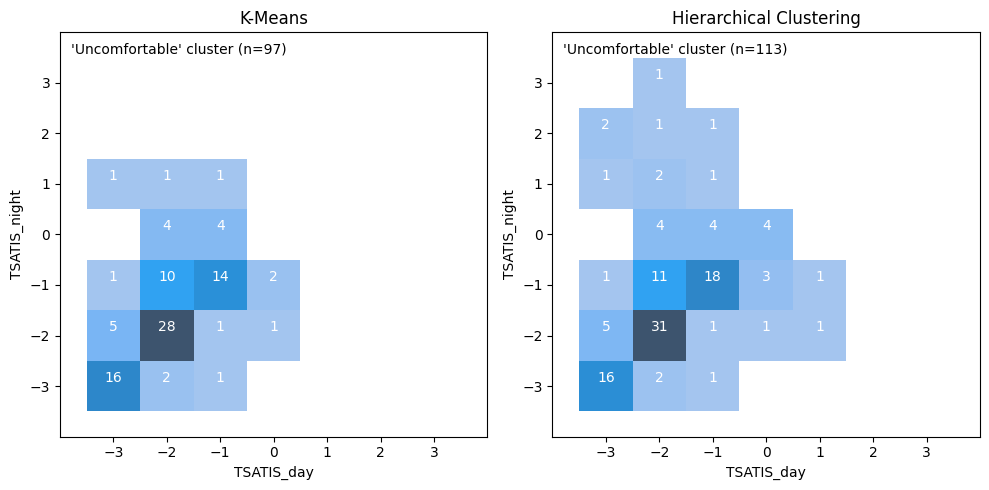

In [208]:
# List of filter conditions
filters = ["cluster_kmeans", "cluster_hierarchical"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loop through filters and create subplots
for i, filter_col in enumerate(filters):
    ax = axes[i]

    # Apply filter condition and plot
    data_subset = merge[merge[filter_col] == 1]
    sns.histplot(merge[merge[filter_col] == 1], x="TSatisf_day", y="TSatisf_night", legend=False, discrete=(True, True), ax=ax)

    ticks = range(-3, 4)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    # Set subplot title
    if filter_col == "cluster_kmeans":
        ax.set_title("K-Means")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Uncomfortable' cluster (n=97)", fontsize=10, ha='left', va='top', color='black')
    elif filter_col == "cluster_hierarchical":
        ax.set_title("Hierarchical Clustering")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Uncomfortable' cluster (n=113)", fontsize=10, ha='left', va='top', color='black')

    # Set x and y axis titles
    ax.set_xlabel("TSATIS_day")
    ax.set_ylabel("TSATIS_night")

    # Add frequency labels using annotate
    for (x, y), count in data_subset.groupby(["TSatisf_day", "TSatisf_night"]).size().items():
        ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TSatisf_HTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

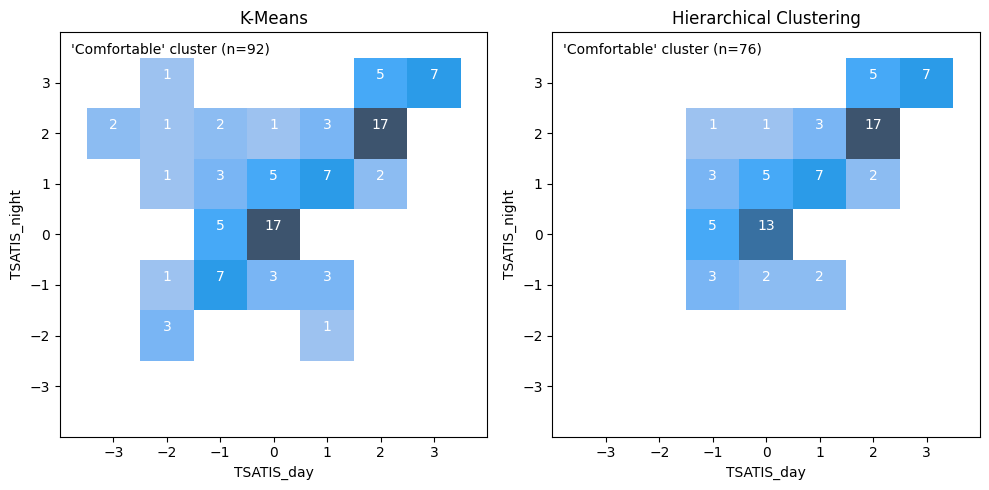

In [209]:
# List of filter conditions
filters = [ "cluster_kmeans", "cluster_hierarchical"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loop through filters and create subplots
for i, filter_col in enumerate(filters):
    ax = axes[i]

    # Apply filter condition and plot
    data_subset = merge[merge[filter_col] == 0]
    sns.histplot(merge[merge[filter_col] == 0], x="TSatisf_day", y="TSatisf_night", legend=False, discrete=(True, True), ax=ax)

    ticks = range(-3, 4)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    # Set subplot title
    if filter_col == "cluster_kmeans":
        ax.set_title("K-Means")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Comfortable' cluster (n=92)", fontsize=10, ha='left', va='top', color='black')
    elif filter_col == "cluster_hierarchical":
        ax.set_title("Hierarchical Clustering")
        # Add text in the top left corner
        ax.text(-3.8, 3.8, "'Comfortable' cluster (n=76)", fontsize=10, ha='left', va='top', color='black')

    # Set x and y axis titles
    ax.set_xlabel("TSATIS_day")
    ax.set_ylabel("TSATIS_night")

    # Add frequency labels using annotate
    for (x, y), count in data_subset.groupby(["TSatisf_day", "TSatisf_night"]).size().items():
        ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TSatisf_LTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

##### **Crosstab Preference**



**K-Means**

In [210]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TPref_day', 'TPref_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TPref_night'],
                               columns=filtered_df['TPref_day'],
                               rownames=['TPref_night'], colnames=['TPref_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TPref_day    -1   0
TPref_night        
-1           90   2


In [211]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TPref_day', 'TPref_night', 'cluster_kmeans']]

# Filter by the desired cluster_kmeans value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_kmeans'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TPref_night'],
                               columns=filtered_df['TPref_day'],
                               rownames=['TPref_night'], colnames=['TPref_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TPref_day    -1   0   1
TPref_night            
-1           51   6   0
 0           19  20   1


**Hierarchical**

In [212]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TPref_day', 'TPref_night', 'cluster_hierarchical']]

# Filter by the desired cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 1]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TPref_night'],
                               columns=filtered_df['TPref_day'],
                               rownames=['TPref_night'], colnames=['TPref_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TPref_day     -1   0
TPref_night         
-1           105   3
 0             5   0


In [213]:
# Create a DataFrame containing the relevant columns
df_subset = merge[['TPref_day', 'TPref_night', 'cluster_hierarchical']]

# Filter by the desired cluster_hierarchical value (replace 'desired_cluster_value' with the actual value you want to filter)
filtered_df = df_subset[df_subset['cluster_hierarchical'] == 0]

# Create a cross-tabulation (confusion matrix-like table)
confusion_matrix = pd.crosstab(index=filtered_df['TPref_night'],
                               columns=filtered_df['TPref_day'],
                               rownames=['TPref_night'], colnames=['TPref_day'])

# Print the confusion matrix-like table
print(confusion_matrix)

TPref_day    -1   0   1
TPref_night            
-1           36   5   0
 0           14  20   1


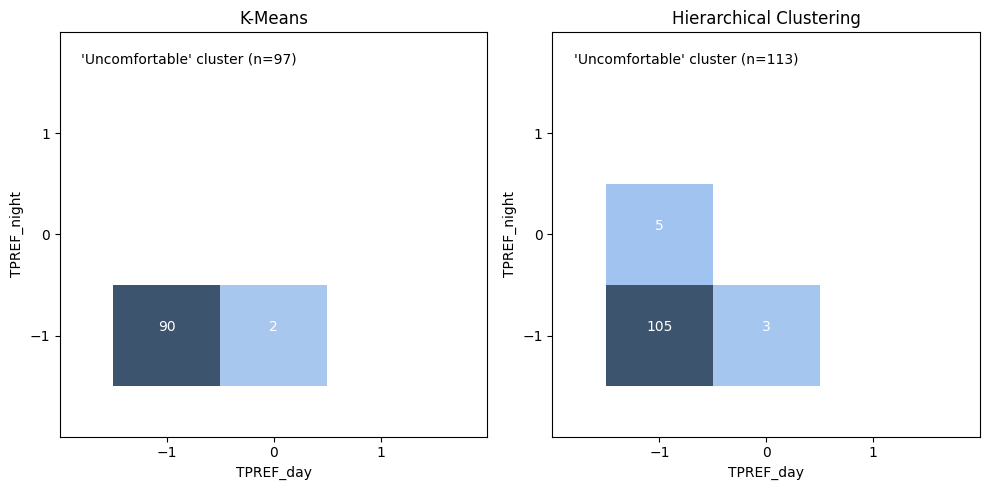

In [214]:
# List of filter conditions
filters = ["cluster_kmeans", "cluster_hierarchical"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loop through filters and create subplots
for i, filter_col in enumerate(filters):
    ax = axes[i]

    # Apply filter condition and plot
    data_subset = merge[merge[filter_col] == 1]
    sns.histplot(merge[merge[filter_col] == 1], x="TPref_day", y="TPref_night", legend=False, discrete=(True, True), ax=ax)

    ticks = range(-1, 2)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # Set subplot title
    if filter_col == "cluster_kmeans":
        ax.set_title("K-Means")
        # Add text in the top left corner
        ax.text(-1.8, 1.8, "'Uncomfortable' cluster (n=97)", fontsize=10, ha='left', va='top', color='black')
    elif filter_col == "cluster_hierarchical":
        ax.set_title("Hierarchical Clustering")
        # Add text in the top left corner
        ax.text(-1.8, 1.8, "'Uncomfortable' cluster (n=113)", fontsize=10, ha='left', va='top', color='black')

    # Set x and y axis titles
    ax.set_xlabel("TPREF_day")
    ax.set_ylabel("TPREF_night")

    # Add frequency labels using annotate
    for (x, y), count in data_subset.groupby(["TPref_day", "TPref_night"]).size().items():
        ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TPref_HTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

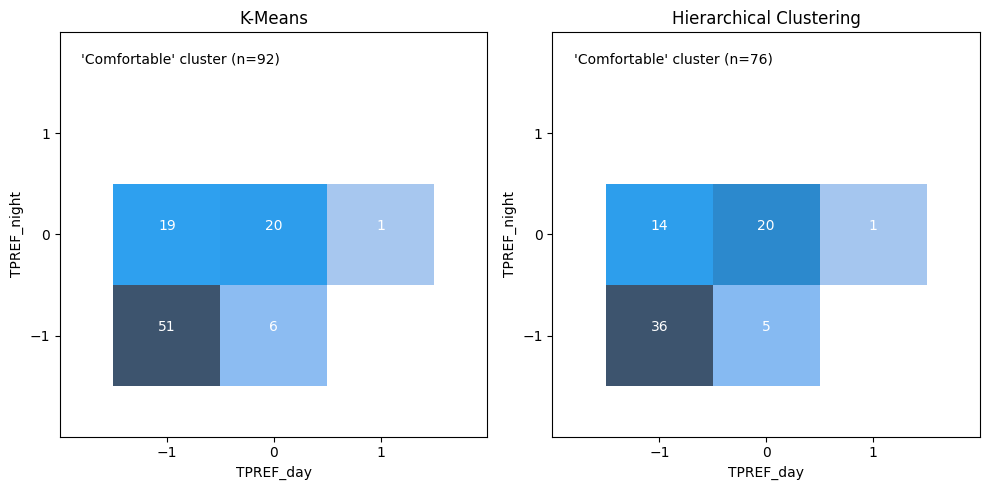

In [215]:
# List of filter conditions
filters = ["cluster_kmeans", "cluster_hierarchical"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loop through filters and create subplots
for i, filter_col in enumerate(filters):
    ax = axes[i]

    # Apply filter condition and plot
    data_subset = merge[merge[filter_col] == 0]
    sns.histplot(merge[merge[filter_col] == 0], x="TPref_day", y="TPref_night", legend=False, discrete=(True, True), ax=ax)

    ticks = range(-1, 2)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # Set subplot title
    if filter_col == "cluster_kmeans":
        ax.set_title("K-Means")
        # Add text in the top left corner
        ax.text(-1.8, 1.8, "'Comfortable' cluster (n=92)", fontsize=10, ha='left', va='top', color='black')
    elif filter_col == "cluster_hierarchical":
        ax.set_title("Hierarchical Clustering")
        # Add text in the top left corner
        ax.text(-1.8, 1.8, "'Comfortable' cluster (n=76)", fontsize=10, ha='left', va='top', color='black')

    # Set x and y axis titles
    ax.set_xlabel("TPREF_day")
    ax.set_ylabel("TPREF_night")

    # Add frequency labels using annotate
    for (x, y), count in data_subset.groupby(["TPref_day", "TPref_night"]).size().items():
        ax.annotate(count, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("TPref_LTD.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

## **Research sub-question 2**



In [216]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### **Replace extreme values with mean values**



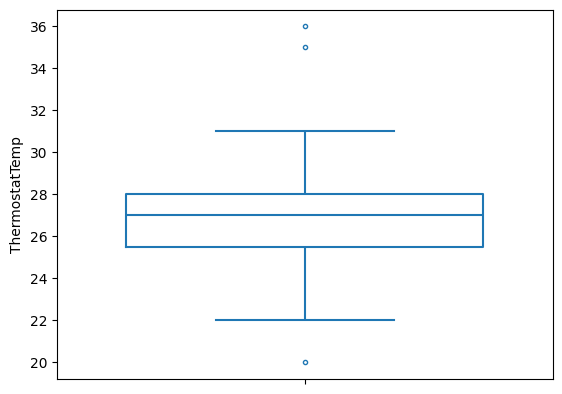

In [217]:
sns.boxplot(data=merge,y="ThermostatTemp",  fill=False, gap= 0.1, fliersize = 3)
plt.show()

In [218]:
temp_hw_true = merge[merge["hw_True"] == True]["ThermostatTemp"].mean()
temp_hw_true

27.11

In [219]:
temp_hw_false = merge[merge["hw_True"] == False]["ThermostatTemp"].mean()
temp_hw_false

26.11615384615385

In [220]:
merge.loc[merge['ThermostatTemp'] == 36.0, 'ThermostatTemp'] = temp_hw_true
merge.loc[merge['ThermostatTemp'] == 35.0, 'ThermostatTemp'] = temp_hw_false

merge[merge["ThermostatTemp"] >= 35][["hw_True","ID","cluster_kmeans","ThermostatTemp","meanTout","TSen_day"]]

,hw_True,ID,cluster_kmeans,ThermostatTemp,meanTout,TSen_day


### **Discomfort - KMeans**



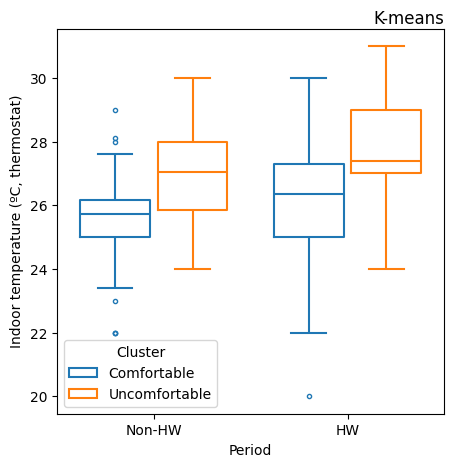

In [221]:
f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
hue_order = ['Comfortable', 'Uncomfortable']

sns.boxplot(data=merge, x="hw_True", y="ThermostatTemp", hue="cluster_kmeans", fill=False, gap= 0.1, fliersize = 3)

# Add labels to the axis and plot
ax.set(xlabel="Period", ylabel="Indoor temperature (ºC, thermostat)")

plt.xticks([0, 1], ['Non-HW', 'HW'])

# Get the legend object
legend = ax.legend()

# Set legend title
legend.set_title("Cluster")

# Set legend labels
for i, label in enumerate(hue_order):
    legend.get_texts()[i].set_text(label)

# Add "K-means" annotation outside the plot
plt.text(1, 1.05, "K-means", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.savefig("temp_kmeans.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [222]:
night = (merge["Hour"] >= 23) | (merge["Hour"] < 7)
night.sum()

14

In [223]:
morning = (merge["Hour"] >= 7) & (merge["Hour"] < 15)
morning.sum()

109

In [224]:
afternoon = (merge["Hour"] >= 15) & (merge["Hour"] < 23)
afternoon.sum()

66

In [225]:
merge["cte_23_7h_True"] = night
merge["cte_7_15h_True"] = morning
merge["cte_15_23h_True"] = afternoon

In [226]:
# Define a function to determine the time of the day
def get_time_of_day(row):
    if row['cte_23_7h_True']:
        return '23:00 - 7:00 h'
    elif row['cte_7_15h_True']:
        return '7:00 - 15:00 h'
    elif row['cte_15_23h_True']:
        return '15:00 - 23:00 h'
    else:
        return 'unknown'  # Handle any case where none of the conditions are True

# Apply the function to each row of the DataFrame
merge['time_of_the_day'] = merge.apply(get_time_of_day, axis=1)

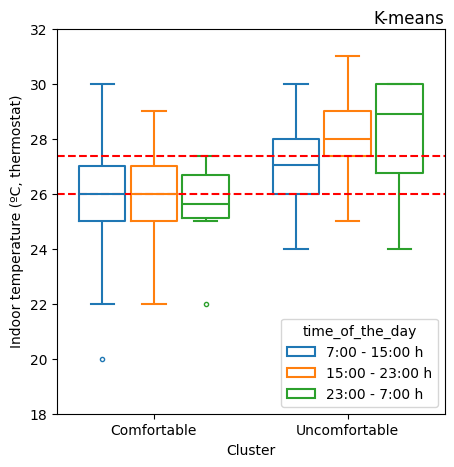

In [227]:
# Calculate the overall average temperature for each cluster_kmeans category
avg_temps = merge.groupby('cluster_kmeans')['ThermostatTemp'].median()

f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
hue_order = ['Comfortable', 'Uncomfortable']

sns.boxplot(data=merge, x="cluster_kmeans", y="ThermostatTemp", hue="time_of_the_day", fill=False, gap= 0.1, fliersize = 3)

# Add labels to the axis and plot
ax.set(xlabel="Cluster", ylabel="Indoor temperature (ºC, thermostat)")

# Set the Y-axis limits
ax.set_ylim(18, 32)

# Set custom X-axis labels
plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add overall average lines for each cluster_kmeans category
for idx, temp in avg_temps.items():
    ax.axhline(temp, color='red', linestyle='--', label=f'Overall Avg {["Comfortable", "Uncomfortable"][idx]} ({temp:.2f}ºC)')

# Add "K-means" annotation outside the plot
plt.text(1, 1.05, "K-means", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.savefig("temp_kmeans_time_day.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [228]:
merge.groupby(["cluster_kmeans", "time_of_the_day"]).agg("count")["ThermostatTemp"]

cluster_kmeans  time_of_the_day
0               15:00 - 23:00 h    29
                23:00 - 7:00 h      6
                7:00 - 15:00 h     62
1               15:00 - 23:00 h    37
                23:00 - 7:00 h      8
                7:00 - 15:00 h     47
Name: ThermostatTemp, dtype: int64

In [229]:
# Drop the "Marca temporal" column temporarily
merge_without_timestamp = merge.drop(columns=["Timestamp"])

# Perform the groupby operation
result = merge_without_timestamp.groupby(["cluster_kmeans", "time_of_the_day"]).agg("median")["ThermostatTemp"]

# Print the result
print(result)

cluster_kmeans  time_of_the_day
0               15:00 - 23:00 h    26.000
                23:00 - 7:00 h     25.615
                7:00 - 15:00 h     26.000
1               15:00 - 23:00 h    28.000
                23:00 - 7:00 h     28.900
                7:00 - 15:00 h     27.050
Name: ThermostatTemp, dtype: float64


In [230]:
# Drop the "Marca temporal" column temporarily
merge_without_timestamp = merge.drop(columns=["time_of_the_day","Timestamp"])

# Perform the groupby operation
result = merge_without_timestamp.groupby(["cluster_kmeans"]).agg("median")["ThermostatTemp"]

# Print the result
print(result)

cluster_kmeans
0    26.00
1    27.38
Name: ThermostatTemp, dtype: float64


In [231]:
# Group by 'group' and 'Rehab_No' and aggregate the mean of 'temp'
cte_7_15h_True_data = merge[merge["time_of_the_day"] == '7:00 - 15:00 h']
cte_15_23h_True_data = merge[merge["time_of_the_day"] == '15:00 - 23:00 h']
cte_23_7h_True_data = merge[merge["time_of_the_day"] == '23:00 - 7:00 h']

cte_7_15h_True_cluster_True = cte_7_15h_True_data[cte_7_15h_True_data["cluster_kmeans"] == 1]
cte_15_23h_True_cluster_True = cte_15_23h_True_data[cte_15_23h_True_data["cluster_kmeans"] == 1]
cte_23_7h_True_cluster_True = cte_23_7h_True_data[cte_23_7h_True_data["cluster_kmeans"] == 1]
cluster_True = merge[merge["cluster_kmeans"] == 1]

cte_7_15h_True_cluster_False = cte_7_15h_True_data[cte_7_15h_True_data["cluster_kmeans"] == 0]
cte_15_23h_True_cluster_False = cte_15_23h_True_data[cte_15_23h_True_data["cluster_kmeans"] == 0]
cte_23_7h_True_cluster_False = cte_23_7h_True_data[cte_23_7h_True_data["cluster_kmeans"] == 0]
cluster_False = merge[merge["cluster_kmeans"] == 0]

In [232]:
from scipy.stats import mannwhitneyu

In [233]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(cluster_True["ThermostatTemp"], cluster_False["ThermostatTemp"])

In [234]:
# Display the test results
print("Mann-Whitney U Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("There is no statistically significant difference between the groups.")

Mann-Whitney U Test Results:
Statistic: 6889.0
P-value: 9.463942635866735e-11
The difference between the groups is statistically significant.


### **Discomfort - Hclust**



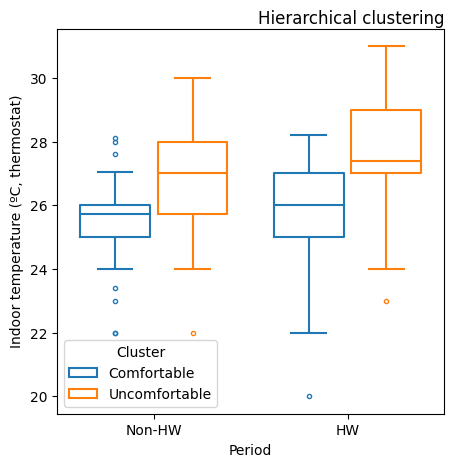

In [235]:
f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
hue_order = ['Comfortable', 'Uncomfortable']

sns.boxplot(data=merge, x="hw_True", y="ThermostatTemp", hue="cluster_hierarchical", fill=False, gap= 0.1, fliersize = 3)

# Add labels to the axis and plot
ax.set(xlabel="Period", ylabel="Indoor temperature (ºC, thermostat)")

plt.xticks([0, 1], ['Non-HW', 'HW'])

# Get the legend object
legend = ax.legend()

# Set legend title
legend.set_title("Cluster")

# Set legend labels
for i, label in enumerate(hue_order):
    legend.get_texts()[i].set_text(label)

# Add "K-means" annotation outside the plot
plt.text(1, 1.05, "Hierarchical clustering", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.savefig("temp_hclust.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

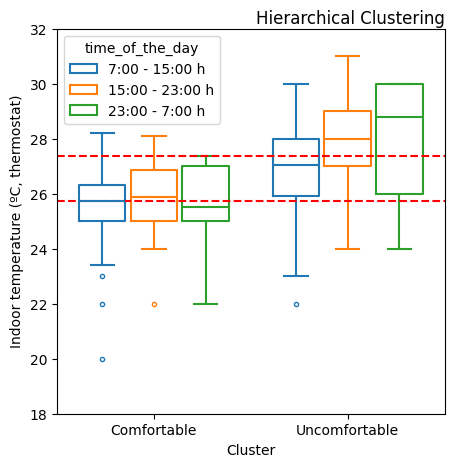

In [236]:
# Calculate the overall average temperature for each cluster_hierarchical category
avg_temps = merge.groupby('cluster_hierarchical')['ThermostatTemp'].median()

f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
hue_order = ['Comfortable', 'Uncomfortable']

sns.boxplot(data=merge, x="cluster_hierarchical", y="ThermostatTemp", hue="time_of_the_day", fill=False, gap= 0.1, fliersize = 3)

# Add labels to the axis and plot
ax.set(xlabel="Cluster", ylabel="Indoor temperature (ºC, thermostat)")

# Set the Y-axis limits
ax.set_ylim(18, 32)

# Set custom X-axis labels
plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add overall average lines for each cluster_hierarchical category
for idx, temp in avg_temps.items():
    ax.axhline(temp, color='red', linestyle='--', label=f'Overall Avg {["Comfortable", "Uncomfortable"][idx]} ({temp:.2f}ºC)')

# Add "K-means" annotation outside the plot
plt.text(1, 1.05, "Hierarchical Clustering", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.savefig("temp_hierarchical_time_day.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [237]:
merge.groupby(["cluster_hierarchical", "time_of_the_day"]).agg("count")["ThermostatTemp"]

cluster_hierarchical  time_of_the_day
0                     15:00 - 23:00 h    22
                      23:00 - 7:00 h      5
                      7:00 - 15:00 h     49
1                     15:00 - 23:00 h    44
                      23:00 - 7:00 h      9
                      7:00 - 15:00 h     60
Name: ThermostatTemp, dtype: int64

In [238]:
# Drop the "Marca temporal" column temporarily
merge_without_timestamp = merge.drop(columns=["Timestamp"])

# Perform the groupby operation
result = merge_without_timestamp.groupby(["cluster_hierarchical", "time_of_the_day"]).agg("median")["ThermostatTemp"]

# Print the result
print(result)

cluster_hierarchical  time_of_the_day
0                     15:00 - 23:00 h    25.865
                      23:00 - 7:00 h     25.500
                      7:00 - 15:00 h     25.730
1                     15:00 - 23:00 h    28.000
                      23:00 - 7:00 h     28.800
                      7:00 - 15:00 h     27.050
Name: ThermostatTemp, dtype: float64


In [239]:
merge.groupby(["hw_True","cluster_hierarchical"]).agg("count")["ThermostatTemp"]

hw_True  cluster_hierarchical
False    0                       45
         1                       33
True     0                       31
         1                       80
Name: ThermostatTemp, dtype: int64

In [240]:
# Drop the "Marca temporal" column temporarily
merge_without_timestamp = merge.drop(columns=["time_of_the_day","Timestamp"])

# Perform the groupby operation
result = merge_without_timestamp.groupby(["cluster_hierarchical"]).agg("median")["ThermostatTemp"]

# Print the result
print(result)

cluster_hierarchical
0    25.73
1    27.38
Name: ThermostatTemp, dtype: float64


In [241]:
# Group by 'group' and 'Rehab_No' and aggregate the mean of 'temp'
cte_7_15h_True_data = merge[merge["time_of_the_day"] == '7:00 - 15:00 h']
cte_15_23h_True_data = merge[merge["time_of_the_day"] == '15:00 - 23:00 h']
cte_23_7h_True_data = merge[merge["time_of_the_day"] == '23:00 - 7:00 h']

cte_7_15h_True_cluster_True = cte_7_15h_True_data[cte_7_15h_True_data["cluster_hierarchical"] == 1]
cte_15_23h_True_cluster_True = cte_15_23h_True_data[cte_15_23h_True_data["cluster_hierarchical"] == 1]
cte_23_7h_True_cluster_True = cte_23_7h_True_data[cte_23_7h_True_data["cluster_hierarchical"] == 1]
cluster_True = merge[merge["cluster_hierarchical"] == 1]

cte_7_15h_True_cluster_False = cte_7_15h_True_data[cte_7_15h_True_data["cluster_hierarchical"] == 0]
cte_15_23h_True_cluster_False = cte_15_23h_True_data[cte_15_23h_True_data["cluster_hierarchical"] == 0]
cte_23_7h_True_cluster_False = cte_23_7h_True_data[cte_23_7h_True_data["cluster_hierarchical"] == 0]
cluster_False = merge[merge["cluster_hierarchical"] == 0]

In [242]:
from scipy.stats import mannwhitneyu

In [243]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(cte_23_7h_True_cluster_True["ThermostatTemp"], cte_23_7h_True_cluster_False["ThermostatTemp"])

In [244]:
# Display the test results
print("Mann-Whitney U Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("There is no statistically significant difference between the groups.")

Mann-Whitney U Test Results:
Statistic: 35.5
P-value: 0.09375771362679833
There is no statistically significant difference between the groups.


### **Survey Time of Response**



#### **K-means**



In [245]:
# Group by 'group' and 'Rehab_No' and aggregate the mean of 'temp'
comf = merge[merge["cluster_kmeans"] == 0]
uncomf = merge[merge["cluster_kmeans"] == 1]

In [246]:
comf["Hour"].median()

13.0

In [247]:
uncomf["Hour"].median()

13.5

In [248]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(comf["Hour"], uncomf["Hour"])

In [249]:
# Display the test results
print("Mann-Whitney U Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("There is no statistically significant difference between the groups.")

Mann-Whitney U Test Results:
Statistic: 3882.0
P-value: 0.12143616212107472
There is no statistically significant difference between the groups.


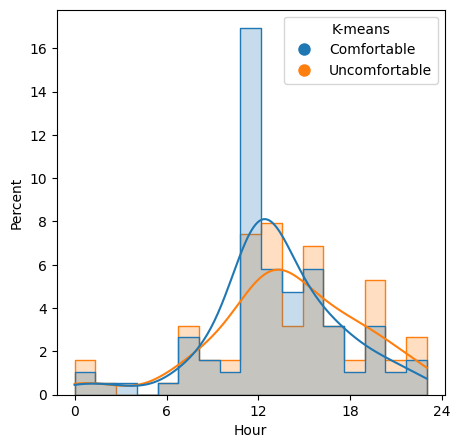

In [250]:
f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
label_mapping = {0: 'Comfortable', 1: 'Uncomfortable'}

sns.histplot(merge, x="Hour", legend=True,  ax=ax, stat="percent", hue="cluster_kmeans", kde=True, element="step")
plt.xticks([0, 6, 12, 18, 24])  # Set x-axis ticks to only 0, 6, 12, and 18

# Get the legend object
legend = ax.legend()

# Set legend title
legend.set_title("K-means")

# Set legend handles and labels using the mapping dictionary
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='C{}'.format(i)) for i in range(2)]
labels = [label_mapping[i] for i in range(2)]
ax.legend(handles=handles, labels=labels, title="K-means")

plt.savefig("hour_kmeans.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

#### **Hierarchical Clustering**



In [251]:
# Group by 'group' and 'Rehab_No' and aggregate the mean of 'temp'
comf = merge[merge["cluster_hierarchical"] == 0]
uncomf = merge[merge["cluster_hierarchical"] == 1]

In [252]:
comf["Hour"].median()

12.0

In [253]:
uncomf["Hour"].median()

13.0

In [254]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(comf["Hour"], uncomf["Hour"])

In [255]:
# Display the test results
print("Mann-Whitney U Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("There is no statistically significant difference between the groups.")

Mann-Whitney U Test Results:
Statistic: 3724.5
P-value: 0.12109970012040705
There is no statistically significant difference between the groups.


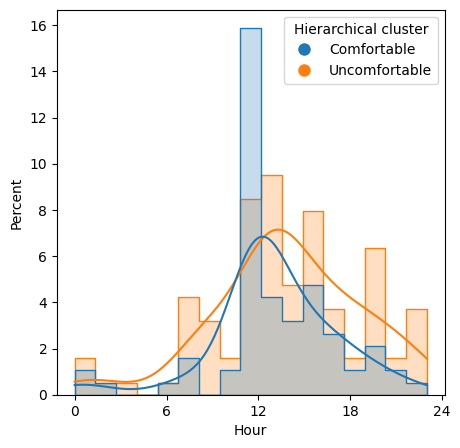

In [256]:
f, ax = plt.subplots(figsize=(5, 5))

# Set the order for legend labels
label_mapping = {0: 'Comfortable', 1: 'Uncomfortable'}

sns.histplot(merge, x="Hour", legend=True,  ax=ax, stat="percent", hue="cluster_hierarchical", kde=True, element="step")
plt.xticks([0, 6, 12, 18, 24])  # Set x-axis ticks to only 0, 6, 12, and 18

# Get the legend object
legend = ax.legend()

# Set legend title
legend.set_title("Hierarchical cluster")

# Set legend handles and labels using the mapping dictionary
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='C{}'.format(i)) for i in range(2)]
labels = [label_mapping[i] for i in range(2)]
ax.legend(handles=handles, labels=labels, title="Hierarchical cluster")

plt.savefig("hour_hclust.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

## **Research sub-question 3 [conducted in RStudio]**

Use the csv files down below to run the code in R. You can find the code in [Github](https://github.com/juan-gamero-salinas/climateready-survey-pamplona)

### **K Means**

In [257]:
para_exportar = merge[['meanTout', 'Gender',
       'Age', 'NatVent_night', 'UsesCoolingAlternatives',
       'hw_True', 'cte_23_7h_True', 'cte_7_15h_True', 'cte_15_23h_True',
       'ShadingDevices_No', 'ShadingDevices_WhenDirectSun',
       'ShadingDevices_AllAfternoon', 'ShadingDevices_AllMorning',
       'ShadingDevices_AllDay', 'NatVent_day_ToutCool',
       'NatVent_day_Anytime', 'NatVent_day_No', 'hasAC_No',
       'hasAC_DormOrLiving', 'hasAC_DormAndLiving', 'hasAC_AllRooms',
       'HouseholdSize', 'is_31001', 'is_31002', 'is_31003', 'is_31004',
       'is_31005', 'is_31006', 'is_31007', 'is_31008', 'is_31009', 'is_31010',
       'is_31011', 'is_31012', 'is_31013', 'is_31014', 'is_31015', 'is_31016',
       'isNot_pamplona', 'before_1980', 'between_1980_2006', 'after_2007',
       "dwelling_OldTown",'dwelling_Block', 'dwelling_Tower', 'dwelling_Detached',
       'dwelling_Other', 'Rehab_No', 'Rehab_Yes', 'Income_below1500',
       'Income_between_1500_3500', 'Income_above_3500', 'Occ_NormallyAtHome',
       'Occ_NotAlwaysAtHome', 'SrfcArea_below90',
       'Storey_UpperFloor', 'Storey_NotApartment',
       'numOrient_1', 'numOrient_above2', 'LivRoom_SrfcAreaWindow_below2',
       'LivRoom_SrfcAreaWindow_above2', 'Bedroom_SrfcAreaWindow_below2',
       'Bedroom_SrfcAreaWindow_above2', 'AC_Installed_Yes',
       'WouldYouInstallAC_Yes', 'hasCoolRoom', 'hasCoolingAlternatives',
       'cluster_kmeans'
       ]]

In [258]:
R_logistic = para_exportar.reset_index(drop=True)
R_logistic.to_csv('R_logistic_kmeans.csv', sep=';', index=False)

### **HClust**

In [259]:
para_exportar = merge[['meanTout', 'Gender',
       'Age', 'NatVent_night', 'UsesCoolingAlternatives',
       'hw_True', 'cte_23_7h_True', 'cte_7_15h_True', 'cte_15_23h_True',
       'ShadingDevices_No', 'ShadingDevices_WhenDirectSun',
       'ShadingDevices_AllAfternoon', 'ShadingDevices_AllMorning',
       'ShadingDevices_AllDay', 'NatVent_day_ToutCool',
       'NatVent_day_Anytime', 'NatVent_day_No', 'hasAC_No',
       'hasAC_DormOrLiving', 'hasAC_DormAndLiving', 'hasAC_AllRooms',
       'HouseholdSize', 'is_31001', 'is_31002', 'is_31003', 'is_31004',
       'is_31005', 'is_31006', 'is_31007', 'is_31008', 'is_31009', 'is_31010',
       'is_31011', 'is_31012', 'is_31013', 'is_31014', 'is_31015', 'is_31016',
       'isNot_pamplona', 'before_1980', 'between_1980_2006', 'after_2007',
       "dwelling_OldTown",'dwelling_Block', 'dwelling_Tower', 'dwelling_Detached',
       'dwelling_Other', 'Rehab_No', 'Rehab_Yes', 'Income_below1500',
       'Income_between_1500_3500', 'Income_above_3500', 'Occ_NormallyAtHome',
       'Occ_NotAlwaysAtHome', 'SrfcArea_below90',
       'Storey_UpperFloor', 'Storey_NotApartment',
       'numOrient_1', 'numOrient_above2', 'LivRoom_SrfcAreaWindow_below2',
       'LivRoom_SrfcAreaWindow_above2', 'Bedroom_SrfcAreaWindow_below2',
       'Bedroom_SrfcAreaWindow_above2', 'AC_Installed_Yes',
       'WouldYouInstallAC_Yes', 'hasCoolRoom', 'hasCoolingAlternatives',
       "cluster_hierarchical"
       ]]

In [260]:
R_logistic = para_exportar.reset_index(drop=True)
R_logistic.to_csv('R_logistic_hclust.csv', sep=';', index=False)

## **Research sub-question 4**

In [261]:
from scipy.stats import fisher_exact
import pandas as pd

### **Sleep & Heat symptoms**

In [262]:
heat = merge["HeatSymptoms"] == True
sleep = merge["SleepingProblems"] == True

In [263]:
merge["HeatSymptoms_SleepingProblems"] = None  # Initialize with None
merge.loc[heat & sleep, "HeatSymptoms_SleepingProblems"] = True
merge.loc[~(heat & sleep), "HeatSymptoms_SleepingProblems"] = False

In [264]:
merge.groupby("HeatSymptoms").size()

HeatSymptoms
False    136
True      53
dtype: int64

In [265]:
merge.groupby("SleepingProblems").size()

SleepingProblems
False    141
True      48
dtype: int64

In [266]:
# Create a contingency table
contingency_table = pd.crosstab(merge['cluster_kmeans'], merge['HeatSymptoms'])

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nOdds Ratio:", odds_ratio)
print("P-value:", p_value)

Contingency Table:
HeatSymptoms    False  True 
cluster_kmeans              
0                  89      8
1                  47     45

Odds Ratio: 10.65159574468085
P-value: 2.2469912013918138e-10


In [267]:
# Create a contingency table
contingency_table = pd.crosstab(merge['cluster_hierarchical'], merge['HeatSymptoms'])

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nOdds Ratio:", odds_ratio)
print("P-value:", p_value)

Contingency Table:
HeatSymptoms          False  True 
cluster_hierarchical              
0                        73      3
1                        63     50

Odds Ratio: 19.312169312169313
P-value: 9.284068119898083e-11


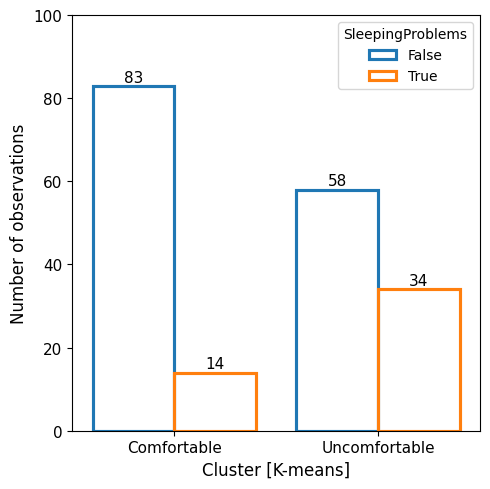

In [268]:
# Create a bar plot using Seaborn
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='cluster_kmeans', hue='SleepingProblems', data=merge, fill=False)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set labels for the axis and plot with consistent font size
ax.set_xlabel("Cluster [K-means]", fontsize=12)
ax.set_ylabel("Number of observations", fontsize=12)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add value annotations above each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Check if the height is greater than zero
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig("ft_kmeans_sleep.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

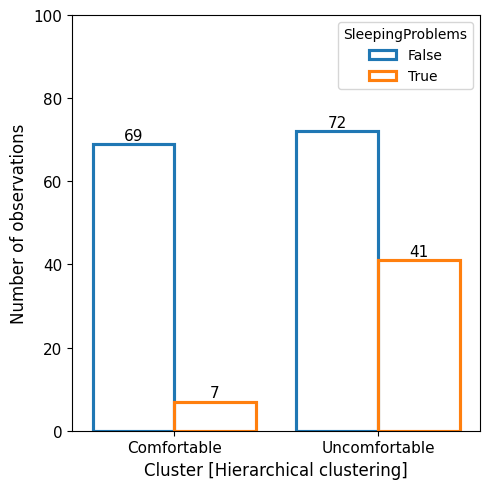

In [269]:
# Create a bar plot using Seaborn
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='cluster_hierarchical', hue='SleepingProblems', data=merge, fill=False)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set labels for the axis and plot with consistent font size
ax.set_xlabel("Cluster [Hierarchical clustering]", fontsize=12)
ax.set_ylabel("Number of observations", fontsize=12)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add value annotations above each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Check if the height is greater than zero
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig("ft_hclust_sleep.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

In [270]:
# Create a contingency table
contingency_table = pd.crosstab(merge['cluster_kmeans'], merge['SleepingProblems'])

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nOdds Ratio:", odds_ratio)
print("P-value:", p_value)

Contingency Table:
SleepingProblems  False  True 
cluster_kmeans                
0                    83     14
1                    58     34

Odds Ratio: 3.4753694581280787
P-value: 0.00042707947842490177


In [271]:
# Create a contingency table
contingency_table = pd.crosstab(merge['cluster_hierarchical'], merge['SleepingProblems'])

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nOdds Ratio:", odds_ratio)
print("P-value:", p_value)

Contingency Table:
SleepingProblems      False  True 
cluster_hierarchical              
0                        69      7
1                        72     41

Odds Ratio: 5.613095238095238
P-value: 1.6894142777081185e-05


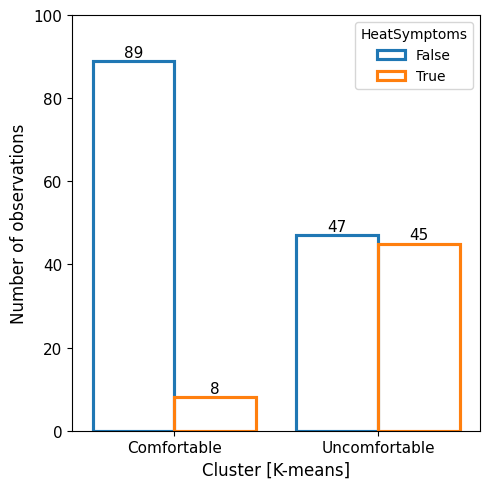

In [272]:
# Create a bar plot using Seaborn
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='cluster_kmeans', hue='HeatSymptoms', data=merge, fill=False)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set labels for the axis and plot with consistent font size
ax.set_xlabel("Cluster [K-means]", fontsize=12)
ax.set_ylabel("Number of observations", fontsize=12)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add value annotations above each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Check if the height is greater than zero
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}', ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("ft_kmeans_heat.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()

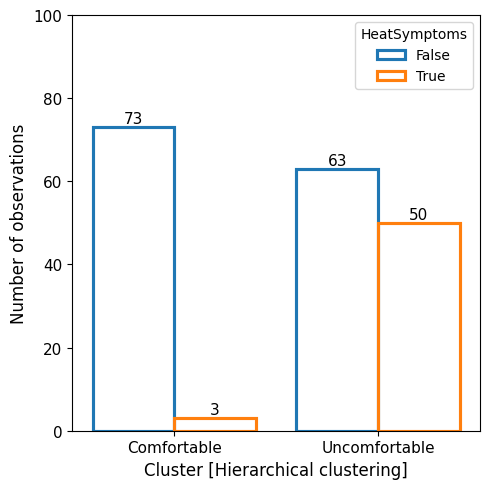

In [273]:
# Create a bar plot using Seaborn
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='cluster_hierarchical', hue='HeatSymptoms', data=merge, fill=False)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set labels for the axis and plot with consistent font size
ax.set_xlabel("Cluster [Hierarchical clustering]", fontsize=12)
ax.set_ylabel("Number of observations", fontsize=12)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.xticks([0, 1], ['Comfortable', 'Uncomfortable'])

# Add value annotations above each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Check if the height is greater than zero
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig("ft_hclust_heat.png", dpi=300)  # Save the plot as PNG with 300dpi
plt.show()